# Binary classification with Keras neural network

English is not my native language, so sorry for any mistake.

If you like my Kernel, give me some feedback and also votes up my kernel.

### Import

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
ROOT_PATH =  os.path.join(os.getenv('HOME'), 'aiffel')

### Img

In [37]:
print(os.listdir(ROOT_PATH+ '/chest_xray/train'))

print(os.listdir(ROOT_PATH+ '/chest_xray/test'))

['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


NORMAL


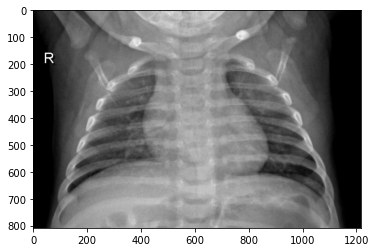

In [38]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img(str(ROOT_PATH + '/chest_xray/train/NORMAL/') + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


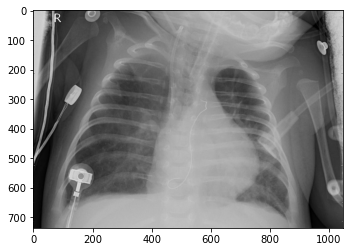

In [39]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img(str(ROOT_PATH + '/chest_xray/train/PNEUMONIA/') + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

### Create variable

In [40]:
# dimensions of our images.
img_width, img_height = 150, 150

In [41]:
train_data_dir = str(ROOT_PATH + '/chest_xray/chest_xray/train')
validation_data_dir = str(ROOT_PATH + '/chest_xray/chest_xray/val')
test_data_dir = str(ROOT_PATH + '/chest_xray/chest_xray/test')

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [42]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create Sequential model

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Check information about model

In [44]:
model.layers

In [45]:
model.input

<tf.Tensor 'conv2d_4_input:0' shape=(None, 150, 150, 3) dtype=float32>

In [46]:
model.output

<tf.Tensor 'activation_9/Identity:0' shape=(None, 1) dtype=float32>

### Compile

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Upload img

In [48]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [49]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [50]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [51]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [52]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Fit model

In [53]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 1 steps
Epoch 1/20
326/326 [==============================] - 45s 138ms/step - loss: 0.4417 - accuracy: 0.8041 - val_loss: 0.7291 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - 45s 138ms/step - loss: 0.2931 - accuracy: 0.8767 - val_loss: 0.7857 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 44s 135ms/step - loss: 0.2762 - accuracy: 0.8924 - val_loss: 0.6306 - val_accuracy: 0.8125
Epoch 4/20
326/326 [==============================] - 44s 136ms/step - loss: 0.2476 - accuracy: 0.9061 - val_loss: 1.1171 - val_accuracy: 0.6875
Epoch 5/20
326/326 [==============================] - 44s 135ms/step - loss: 0.2433 - accuracy: 0.9139 - val_loss: 0.3800 - val_accuracy: 0.7500
Epoch 6/20
326/326 [==============================] - 47s 143ms/step - loss: 0.2286 - accuracy: 0.9172 - val_loss: 0.4430 - val_accuracy: 0.8750
Epoch 7/20
326/326 [==================

### Save model`s weights

In [55]:
model.save_weights('first_try.h5')

In [54]:
# evaluate the model
scores = model.evaluate(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  ...
    to  
  ['...']
39/39 [==============================] - 3s 81ms/step - loss: 0.5705 - accuracy: 0.8734

accuracy: 87.34%
